In [3]:
# Model Design 
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist


In [27]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [28]:
(img_tarin, lable_tarin),(img_test, label_test) = fashion_mnist.load_data()

In [6]:
img_tarin = img_tarin / 255
img_test = img_test / 255

In [29]:
img_tarin

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
from keras.utils import to_categorical

In [18]:
# img_tarin = img_tarin.reshape(img_tarin.shape[0], 28, 28, 1)
# img_test = img_test.reshape(img_test.shape[0], 28, 28, 1)
# input_shape = (28, 28, 1)

# # convert class vectors to binary class matrices
# lable_tarin = to_categorical(lable_tarin, num_classes=10)
# label_test = to_categorical(label_test, num_classes=10)

# x_train = img_tarin.astype('float32')
# x_test = img_test.astype('float32')
# x_train /= 255
# x_test /= 255

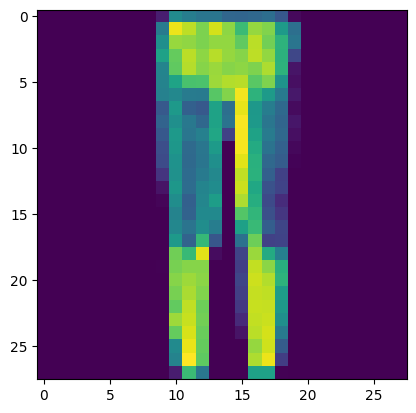

In [46]:
plt.figure()
plt.imshow(img_test[3])
plt.show()

In [10]:
from keras import models
from keras import layers

In [20]:
network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.add(layers.Dense(10))

In [18]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 28, 512)           14848     
                                                                 
 dense_2 (Dense)             (None, 28, 10)            5130      
                                                                 
Total params: 19978 (78.04 KB)
Trainable params: 19978 (78.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
network.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [38]:
network.fit(img_tarin, lable_tarin, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3029 - accuracy: 0.0986
Epoch 2/3
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3029 - accuracy: 0.0971
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3029 - accuracy: 0.0993


In [39]:
test_loss, test_acc = network.evaluate(img_test,  label_test, verbose=2)
print(test_loss)
print(test_acc)

313/313 - 1s - loss: 2.3027 - accuracy: 0.1000 - 555ms/epoch - 2ms/step
2.302692413330078
0.10000000149011612


In [40]:
probability_model = tf.keras.Sequential([network, 
                                         tf.keras.layers.Softmax()])

In [45]:
predictions = probability_model.predict(img_test)
print(predictions[1])

313/313 [==============================] - 1s 2ms/step
[0.10128646 0.09948758 0.10078675 0.10077573 0.10252968 0.09982868
 0.09842565 0.09729517 0.09876925 0.10081502]
